In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('clean_dataset.csv')
df = df.dropna()
df = df[df['RiskCategory'] != 'High Risk']

features = [
    'TotalMinutesAsleep', 
    'TotalSteps', 
    'Calories', 
    'SedentaryMinutes_x', 
    'VeryActiveMinutes_x', 
    'AverageHeartRate'
]
X = df[features]
y = df['RiskCategory']

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
xgb.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [01:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [7]:
y_pred_lr = lr.predict_proba(X_test)[:,1]
y_pred_rf = rf.predict_proba(X_test)[:,1]
y_pred_svm = svm.predict_proba(X_test)[:,1]
y_pred_xgb = xgb.predict_proba(X_test)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)

auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)
auc_xgb = auc(fpr_xgb, tpr_xgb)

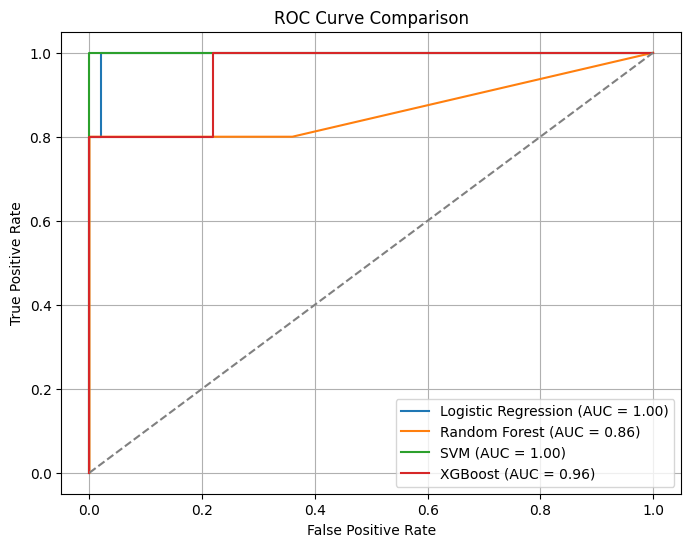

In [8]:
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
